In [65]:
import pandas as pd
import numpy as np
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import joblib
print("all neccessary library are imported")

all neccessary library are imported


In [66]:
x,y=[],[]
with open('Data/SMSSpamCollection.txt','r') as file:
    data=file.read()
    for data_item in  data.split('\n'):
        if len(data_item.split('\t'))==2:
            y.append(data_item.split('\t')[0])
            x.append(data_item.split('\t')[1])
print("successfully read the data from the text file and splitted into x and y")

successfully read the data from the text file and splitted into x and y


In [67]:
len(x),len(y)

(5574, 5574)

In [68]:
data_dict={"mail_message":x,"label":y}
df=pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [70]:
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['mail_message'][i])
    message = message.lower()
    df['mail_message'][i]=message
df.head(10)

C:\Users\rizwan\AppData\Local\Temp\ipykernel_5472\3959327020.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mail_message'][i]=message


,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham
5,freemsg hey there darling it s been week s n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request melle melle oru minnamin...,ham
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam


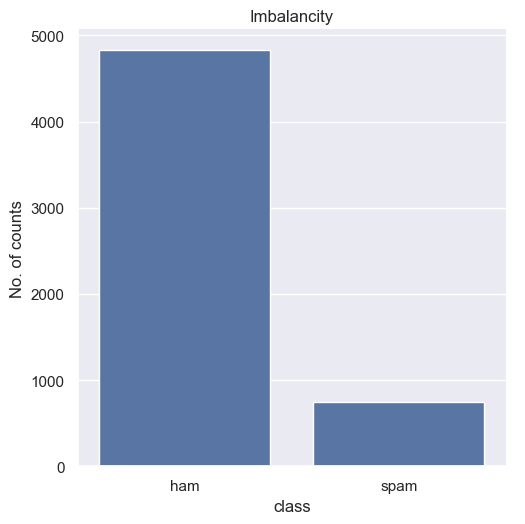

In [71]:
classs = list(df['label'].value_counts().index)
valu = list(df['label'].value_counts().values)
sb.set(rc={'figure.figsize':(8,20)})
sb.catplot(x=classs,y=valu,kind='bar')
plt.title("Imbalancity")
plt.xlabel("class")
plt.ylabel("No. of counts")
plt.show()

In [72]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [73]:
df.sample(2000)

,mail_message,label
1611,i ll probably be around mu a lot,ham
2170,shop till u drop is it you either k k ...,spam
4055,dont make ne plans for nxt wknd coz she wants ...,ham
892,i am great princess what are you thinking abo...,ham
5337,no it s not pride i m almost lt gt yea...,ham
...,...,...
3800,actually nvm got hella cash we still on for ...,ham
4218,will be office around pm now i am going hos...,ham
4995,my drive can only be read i need to write,ham
2655,its sarcasm nt scarcasim,ham


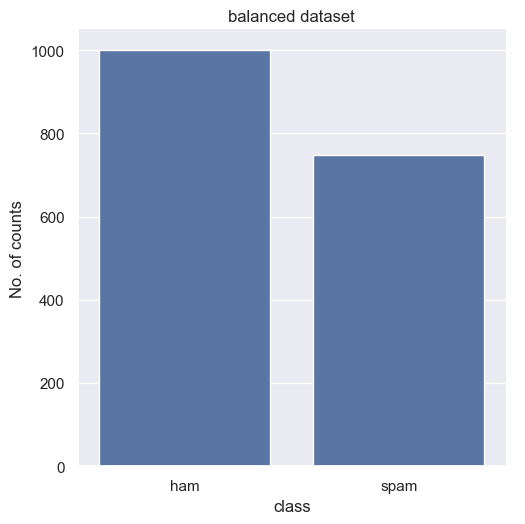

In [74]:
# filtering the dataset
ham=df[df['label']=='ham'].sample(1000)
spam=df[df['label']=='spam']

# concatenation of dataset
balance_df=pd.concat([ham,spam])

# visualizing the dataset 
classs = list(balance_df['label'].value_counts().index)
valu = list(balance_df['label'].value_counts().values)
sb.set(rc={'figure.figsize':(8,20)})
sb.catplot(x=classs,y=valu,kind='bar')
plt.title("balanced dataset")
plt.xlabel("class")
plt.ylabel("No. of counts")
plt.show()

In [75]:
balance_df['label']=balance_df['label'].map({'ham':0,'spam':1})

In [76]:
balance_df.isnull().sum()

mail_message    0
label           0
dtype: int64

In [77]:
print("duplicates in our dataset are ",balance_df.duplicated().sum())
print("shape of our dataset after removing duplicates ",balance_df.shape)

duplicates in our dataset are  131
shape of our dataset after removing duplicates  (1747, 2)


In [78]:
balance_df.drop_duplicates(inplace=True)

In [79]:
print("duplicates in our dataset are ",balance_df.duplicated().sum())
print("shape of our dataset after removing duplicates",balance_df.shape)

duplicates in our dataset are  0
shape of our dataset after removing duplicates (1616, 2)


In [80]:
x=balance_df['mail_message']
y=balance_df['label']

In [81]:
y.head()

2578    0
1908    0
94      0
4531    0
4695    0
Name: label, dtype: int64

In [82]:
x=x.values
x[0:5]

array(['hey whats up  u sleeping all morning ', 'ello babe u ok ',
       'havent planning to buy later  i check already lido only got     show in e afternoon  u finish work already ',
       'don t forget though that i love you      and i walk beside you  watching over you and keeping your heart warm ',
       'pls give her the food preferably pap very slowly with loads of sugar  you can take up to an hour to give it  and then some water  very very slowly '],
      dtype=object)

In [83]:
x.shape

(1616,)

In [84]:
BOW_obj=CountVectorizer(max_features=2000,stop_words='english')